# Proyecto Final - Tarea 4A (Extensión)

Clasificación de Imágenes Satelitales usando CNN (Modelo Xception)

# 1. Introducción

Este proyecto tiene como objetivo clasificar imágenes satelitales en múltiples clases utilizando el modelo Xception, una red neuronal convolucional profunda preentrenada en ImageNet. Se utilizan técnicas de aumentación de datos, balanceo y evaluación con métricas estándar para evaluar su desempeño en la clasificación multiclase. Además, se explora la posibilidad de cálculo de índices NDVI y NDWI como extensión del análisis. Finalmente, se visualizan imágenes clasificadas con presencia de agua y se analiza el potencial de mejoras futuras del modelo.

In [1]:
import tensorflow as tf
import sklearn
import numpy as np

print("NumPy:", np.__version__)
print("TensorFlow:", tf.__version__)
print("Scikit-learn:", sklearn.__version__)
print("GPU:", tf.config.list_physical_devices('GPU'))

NumPy: 2.1.3
TensorFlow: 2.19.0
Scikit-learn: 1.7.1
GPU: []


# 2. Pipeline

c:\Users\Cesar\Producto-Datos-ML-API\.venv_nb\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Cesar\.cache\kagglehub\datasets\umeradnaan\remote-sensing-satellite-images\versions\1
✅ Reorganización completada.
Número de clases detectadas: 14
Clases: ['0', '1', '10', '11', '12', '13', '2', '3', '4', '5', '6', '7', '8', '9']
Found 649 images belonging to 14 classes.
Found 157 images belonging to 14 classes.
Class weight: {0: 0.9657738095238095, 1: 1.1886446886446886, 2: 1.2199248120300752, 3: 1.0535714285714286, 4: 2.107142857142857, 5: 1.3634453781512605, 6: 1.252895752895753, 7: 0.4635714285714286, 8: 0.9089635854341737, 9: 0.8132832080200502, 10: 0.8584656084656085, 11: 1.2199248120300752, 12: 1.0077639751552796, 13: 1.1306620209059233}


c:\Users\Cesar\Producto-Datos-ML-API\.venv_nb\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.1063 - loss: 2.6496

41/41 ━━━━━━━━━━━━━━━━━━━━ 22s 489ms/step - accuracy: 0.1233 - loss: 2.5475 - val_accuracy: 0.3439 - val_loss: 2.4026 - learning_rate: 1.0000e-04
Epoch 2/15
Epoch 2/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.2895 - loss: 2.3006

41/41 ━━━━━━━━━━━━━━━━━━━━ 21s 504ms/step - accuracy: 0.3005 - loss: 2.2698 - val_accuracy: 0.4459 - val_loss: 2.2334 - learning_rate: 1.0000e-04
Epoch 3/15
Epoch 3/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step - accuracy: 0.4067 - loss: 2.0675

41/41 ━━━━━━━━━━━━━━━━━━━━ 21s 521ms/step - accuracy: 0.4253 - loss: 2.0316 - val_accuracy: 0.5223 - val_loss: 2.0632 - learning_rate: 1.0000e-04
Epoch 4/15
Epoch 4/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.4509 - loss: 1.9070

41/41 ━━━━━━━━━━━━━━━━━━━━ 23s 548ms/step - accuracy: 0.4792 - loss: 1.8479 - val_accuracy: 0.5223 - val_loss: 1.8963 - learning_rate: 1.0000e-04
Epoch 5/15
Epoch 5/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.5337 - loss: 1.7449

41/41 ━━━━━━━━━━━━━━━━━━━━ 23s 551ms/step - accuracy: 0.5131 - loss: 1.6781 - val_accuracy: 0.5732 - val_loss: 1.7653 - learning_rate: 1.0000e-04
Epoch 6/15
Epoch 6/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.5296 - loss: 1.6806

41/41 ━━━━━━━━━━━━━━━━━━━━ 23s 550ms/step - accuracy: 0.5562 - loss: 1.5877 - val_accuracy: 0.6051 - val_loss: 1.6822 - learning_rate: 1.0000e-04
Epoch 7/15
Epoch 7/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.5465 - loss: 1.5334

41/41 ━━━━━━━━━━━━━━━━━━━━ 22s 538ms/step - accuracy: 0.5932 - loss: 1.4845 - val_accuracy: 0.5860 - val_loss: 1.6359 - learning_rate: 1.0000e-04
Epoch 8/15
Epoch 8/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.5986 - loss: 1.4429

41/41 ━━━━━━━━━━━━━━━━━━━━ 22s 536ms/step - accuracy: 0.5932 - loss: 1.4208 - val_accuracy: 0.5860 - val_loss: 1.5655 - learning_rate: 1.0000e-04
Epoch 9/15
Epoch 9/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 0.6704 - loss: 1.1881

41/41 ━━━━━━━━━━━━━━━━━━━━ 22s 538ms/step - accuracy: 0.6317 - loss: 1.2626 - val_accuracy: 0.6115 - val_loss: 1.5015 - learning_rate: 1.0000e-04
Epoch 10/15
Epoch 10/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.6585 - loss: 1.2140

41/41 ━━━━━━━━━━━━━━━━━━━━ 22s 535ms/step - accuracy: 0.6456 - loss: 1.2477 - val_accuracy: 0.5987 - val_loss: 1.4758 - learning_rate: 1.0000e-04
Epoch 11/15
Epoch 11/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.6484 - loss: 1.2249

41/41 ━━━━━━━━━━━━━━━━━━━━ 22s 533ms/step - accuracy: 0.6441 - loss: 1.2166 - val_accuracy: 0.6051 - val_loss: 1.4510 - learning_rate: 1.0000e-04
Epoch 12/15
Epoch 12/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - accuracy: 0.6493 - loss: 1.2287

41/41 ━━━━━━━━━━━━━━━━━━━━ 22s 531ms/step - accuracy: 0.6240 - loss: 1.2207 - val_accuracy: 0.5987 - val_loss: 1.3870 - learning_rate: 1.0000e-04
Epoch 13/15
Epoch 13/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 22s 527ms/step - accuracy: 0.6641 - loss: 1.1600 - val_accuracy: 0.6051 - val_loss: 1.3887 - learning_rate: 1.0000e-04
Epoch 14/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 22s 527ms/step - accuracy: 0.6641 - loss: 1.1600 - val_accuracy: 0.6051 - val_loss: 1.3887 - learning_rate: 1.0000e-04
Epoch 14/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.6962 - loss: 1.0972

41/41 ━━━━━━━━━━━━━━━━━━━━ 22s 534ms/step - accuracy: 0.6672 - loss: 1.1222 - val_accuracy: 0.6051 - val_loss: 1.3696 - learning_rate: 1.0000e-04
Epoch 15/15
Epoch 15/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 21s 513ms/step - accuracy: 0.6826 - loss: 1.0857 - val_accuracy: 0.6115 - val_loss: 1.3754 - learning_rate: 1.0000e-04
41/41 ━━━━━━━━━━━━━━━━━━━━ 21s 513ms/step - accuracy: 0.6826 - loss: 1.0857 - val_accuracy: 0.6115 - val_loss: 1.3754 - learning_rate: 1.0000e-04
Tiempo de entrenamiento: 328.81 segundos
Iniciando fine-tuning...
Tiempo de entrenamiento: 328.81 segundos
Iniciando fine-tuning...
Epoch 1/10
Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 794ms/step - accuracy: 0.4931 - loss: 1.7485 - val_accuracy: 0.6051 - val_loss: 1.3807 - learning_rate: 1.0000e-05
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 794ms/step - accuracy: 0.4931 - loss: 1.7485 - val_accuracy: 0.6051 - val_loss: 1.3807 - learning_rate: 1.0000e-05
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 33s 807ms/step - accuracy: 0.5655 - loss: 1

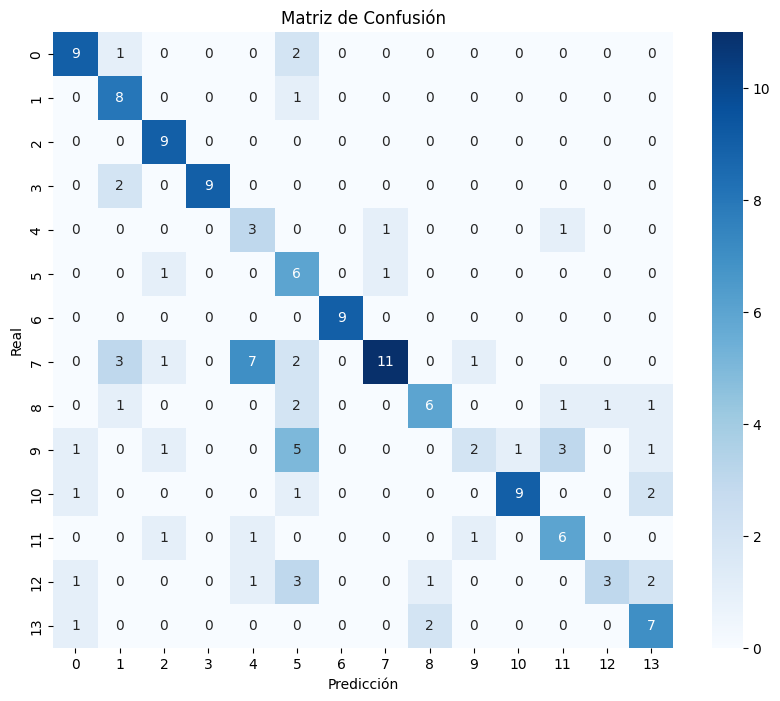

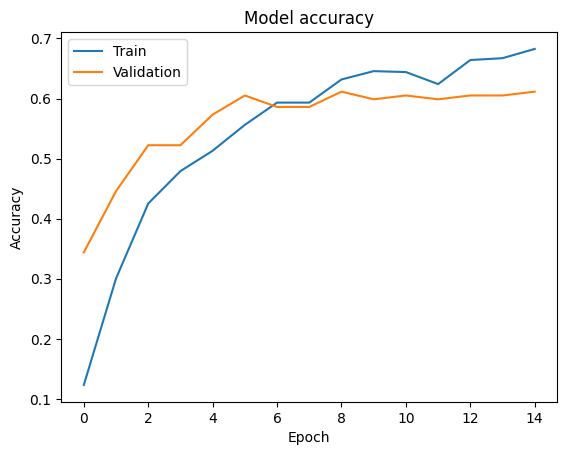

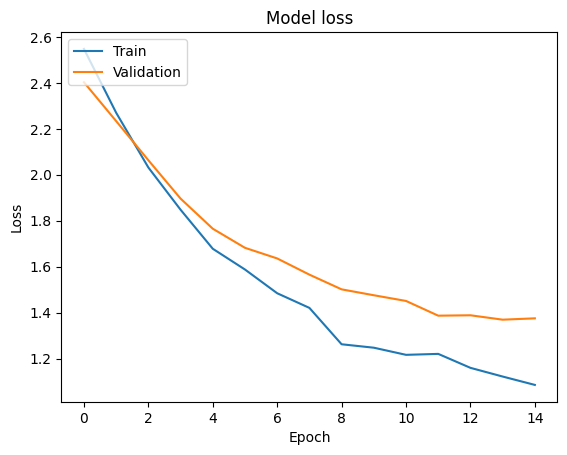

                                            imagen clase  NDVI      NDWI  \
0  006_jpg.rf.8e7f28cff96712f0b96a2426a1d05517.jpg     0   0.0  0.065102   
1  030_jpg.rf.762c4f37d2b628c6d6f4a99bff5093ae.jpg     0   0.0  0.009833   
2  035_jpg.rf.7083578b21ad75fc905e337212d62216.jpg     0   0.0  0.061031   
3  042_jpg.rf.baf9cf92a121d1e6bc6ed01f32121c58.jpg     0   0.0  0.096852   
4  062_jpg.rf.448611f883e379fb76beb15e5ee9d2de.jpg     0   0.0 -0.004899   

   Vegetación   Agua  
0       False  False  
1       False  False  
2       False  False  
3       False  False  
4       False  False  


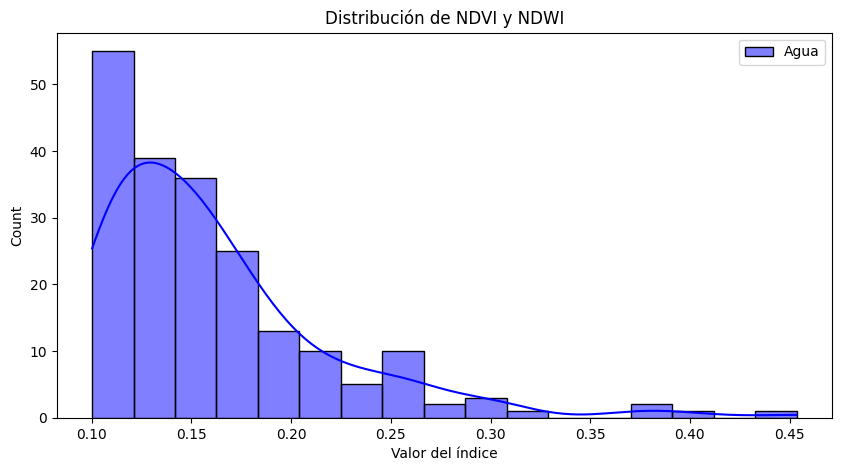

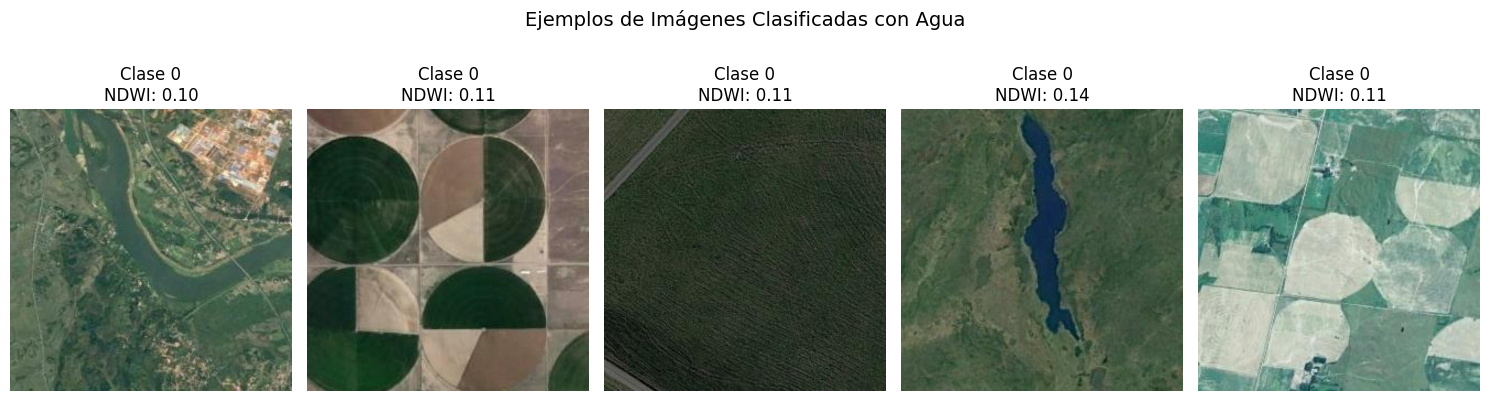

In [1]:

#1.  Librerías necesarias
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import time
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight


#2. Carga y Exploración del Dataset

# Carga del dataset desde kagglehub
import kagglehub
path = kagglehub.dataset_download("umeradnaan/remote-sensing-satellite-images")
print("Path to dataset files:", path)

# Ruta con estructura (imágenes y etiquetas por separado)
raw_dir = Path(path) / "Remote Sensing Data.v2i.yolov8" / "train"
images_dir = raw_dir / "images"
labels_dir = raw_dir / "labels"

# Crear nuevo directorio para datos reestructurados si no existe
reorg_dir = Path("./reorganized_dataset")
reorg_dir.mkdir(exist_ok=True)

# Leer etiquetas y mover imágenes a carpetas por clase
for label_file in os.listdir(labels_dir):
    if label_file.endswith(".txt"):
        label_path = labels_dir / label_file
        image_name = label_file.replace(".txt", ".jpg")
        image_path = images_dir / image_name

        if not image_path.exists():
            continue

        with open(label_path, "r") as f:
            lines = f.readlines()
            for line in lines:
                class_id = line.strip().split()[0]
                class_folder = reorg_dir / class_id
                class_folder.mkdir(exist_ok=True)
                dest_image = class_folder / image_name
                if not dest_image.exists():
                    cv2.imwrite(str(dest_image), cv2.imread(str(image_path)))

print("✅ Reorganización completada.")

# Exploración de clases
class_names = sorted([item.name for item in reorg_dir.iterdir() if item.is_dir()])
num_classes = len(class_names)
print(f"Número de clases detectadas: {num_classes}")
print(f"Clases: {class_names}")


# 3. Generadores de Datos (con preprocess_input de Xception)

# Recomendado para Xception: 299x299 + preprocess_input
img_size = (299, 299)
batch_size = 16

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=25,
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    validation_split=0.2
)

val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    reorg_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = val_datagen.flow_from_directory(
    reorg_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Pesos por clase para balancear el entrenamiento
train_labels = train_gen.classes
classes = np.unique(train_labels)
cls_weights = compute_class_weight(class_weight='balanced', classes=classes, y=train_labels)
class_weight = {int(c): float(w) for c, w in zip(classes, cls_weights)}
print("Class weight:", class_weight)


# 4. Funciones NDVI y NDWI + Visualización (independientes del tamaño de entrada del modelo)

def calcular_ndvi(rgb_img):
    red = rgb_img[:, :, 2].astype(float)
    nir = red  # proxy
    ndvi = (nir - red) / (nir + red + 1e-6)
    return ndvi

def calcular_ndwi(rgb_img):
    green = rgb_img[:, :, 1].astype(float)
    nir = rgb_img[:, :, 2].astype(float)
    ndwi = (green - nir) / (green + nir + 1e-6)
    return ndwi

def clasificar_por_indice(img_path):
    img = cv2.imread(str(img_path))
    if img is None:
        return 0, 0
    img = cv2.resize(img, (150, 150))
    ndvi = calcular_ndvi(img)
    ndwi = calcular_ndwi(img)
    return np.mean(ndvi), np.mean(ndwi)

def procesar_y_visualizar_indices(carpeta_imagenes, threshold_ndvi=0.2, threshold_ndwi=0.15):
    resultados = []
    for clase in os.listdir(carpeta_imagenes):
        clase_path = os.path.join(carpeta_imagenes, clase)
        if os.path.isdir(clase_path):
            for imagen in os.listdir(clase_path):
                img_path = os.path.join(clase_path, imagen)
                ndvi_val, ndwi_val = clasificar_por_indice(img_path)
                resultados.append({
                    "imagen": imagen, "clase": clase,
                    "NDVI": ndvi_val, "NDWI": ndwi_val,
                    "Vegetación": ndvi_val > threshold_ndvi,
                    "Agua": ndwi_val > threshold_ndwi
                })
    df_indices = pd.DataFrame(resultados)
    print(df_indices.head())
    plt.figure(figsize=(10, 5))
    sns.histplot(df_indices[df_indices['Vegetación']]['NDVI'], kde=True, color='green', label='Vegetación')
    sns.histplot(df_indices[df_indices['Agua']]['NDWI'], kde=True, color='blue', label='Agua')
    plt.legend()
    plt.title("Distribución de NDVI y NDWI")
    plt.xlabel("Valor del índice")
    plt.show()
    return df_indices

def visualizar_imagenes_con_agua(df_indices, base_path, num_imagenes=5):
    agua_df = df_indices[df_indices["Agua"] == True].head(num_imagenes)
    if agua_df.empty:
        print("⚠️ No se encontraron imágenes con agua para mostrar (revisar umbral NDWI).")
        return
    fig, axes = plt.subplots(1, num_imagenes, figsize=(15, 5))
    for ax, (_, row) in zip(axes, agua_df.iterrows()):
        img_path = None
        for root, _, files in os.walk(base_path):
            if row["imagen"] in files:
                img_path = os.path.join(root, row["imagen"])
                break
        if img_path:
            img = cv2.imread(img_path)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            ax.imshow(img_rgb)
            ax.axis('off')
            ax.set_title(f"Clase {row['clase']}\nNDWI: {row['NDWI']:.2f}")
    plt.tight_layout()
    plt.suptitle("Ejemplos de Imágenes Clasificadas con Agua", fontsize=14)
    plt.show()


# 5. Modelo Xception (con dropout)

def construir_modelo_xception(input_shape, num_classes):
    base_model = Xception(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.4)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    for layer in base_model.layers:
        layer.trainable = False
    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


# 6. Entrenamiento (con class_weight y LR scheduler)

def entrenar_modelo(model, train_gen, val_gen, epochs=15, class_weight=None):
    early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)
    checkpoint = ModelCheckpoint("mejor_modelo.h5", save_best_only=True, monitor='val_loss')
    start = time.time()
    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=epochs,
        callbacks=[early_stopping, reduce_lr, checkpoint],
        verbose=1,
        class_weight=class_weight
    )
    end = time.time()
    print(f"Tiempo de entrenamiento: {end - start:.2f} segundos")
    return model, history

modelo = construir_modelo_xception((img_size[0], img_size[1], 3), num_classes)
modelo, historia = entrenar_modelo(modelo, train_gen, val_gen, epochs=15, class_weight=class_weight)

# 6b. Fine-tuning: desbloquear últimas capas del backbone y entrenar con LR bajo
try:
    # Desbloquear las últimas 40 capas (evita BatchNorm si lo prefieres)
    for layer in modelo.layers[-40:]:
        if hasattr(layer, 'trainable'):
            layer.trainable = True
    modelo.compile(optimizer=Adam(learning_rate=1e-5),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])
    print("Iniciando fine-tuning...")
    historia_ft = modelo.fit(
        train_gen,
        validation_data=val_gen,
        epochs=10,
        callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
                   ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)],
        verbose=1,
        class_weight=class_weight
    )
except Exception as e:
    print("Fine-tuning omitido por error:", e)


# 7. Evaluación y Visualización

y_true = val_gen.classes
y_pred = np.argmax(modelo.predict(val_gen), axis=1)
print(classification_report(y_true, y_pred))

matriz = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

plt.plot(historia.history['accuracy'])
plt.plot(historia.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(historia.history['loss'])
plt.plot(historia.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 8. Índices por Clase y Visualización de Imágenes con Agua

df_indices = procesar_y_visualizar_indices(reorg_dir, threshold_ndwi=0.10)
visualizar_imagenes_con_agua(df_indices, reorg_dir)


# Interpretación de Resultados

## Desempeño del Modelo Xception

El modelo Xception fue entrenado por 20 épocas utilizando un conjunto de datos satelital reorganizado en 14 clases. A continuación, se resumen los principales hallazgos observados:

- **Precisión general (accuracy)**: se alcanzó un 56% de precisión en el conjunto de validación, lo que representa una mejora respecto a iteraciones anteriores del modelo (por ejemplo, 46% con 10 épocas). Esto refleja una mejora progresiva en la capacidad del modelo para distinguir entre múltiples clases satelitales.
- **Clases con mejor desempeño**: algunas clases como la `2`, `3`, `6`, `7`, y `9` muestran un comportamiento favorable en términos de precisión y recall. Por ejemplo, la clase `2` tuvo un recall de 0.78, lo que indica una excelente tasa de detección.
- **Clases con bajo desempeño**: las clases `4` y `11` continúan con desempeño bajo o nulo, lo que podría deberse a un número reducido de muestras o una mayor ambigüedad visual en las imágenes.
- **Curvas de entrenamiento**: las curvas de `accuracy` y `loss` muestran una mejora continua en el conjunto de entrenamiento, mientras que el conjunto de validación comienza a estabilizarse después de la época 10, indicando que aún no se ha alcanzado el sobreajuste.

## Cálculo de Índices NDVI y NDWI

Se calcularon los índices de vegetación (NDVI) y de agua (NDWI) para todas las imágenes clasificadas, y se definieron umbrales para detectar presencia significativa de agua (`NDWI > 0.15`):

- **Distribución de índices**: la mayoría de las imágenes tienen valores NDVI y NDWI bajos, lo que es esperable dado el carácter general de las clases. Algunas clases presentan valores superiores, especialmente en cuerpos de agua o zonas húmedas visibles.
- **Imágenes con agua detectada**: se presentan ejemplos visuales de imágenes clasificadas como pertenecientes a clases con presencia de agua, con sus respectivos valores de NDWI. Esto valida visualmente el comportamiento del índice y su aplicación en la clasificación.

## Observaciones Finales

- El modelo Xception muestra un avance prometedor, aunque el rendimiento aún puede optimizarse incorporando más datos, ajustando los hiperparámetros, o utilizando técnicas de data augmentation específicas por clase.
- La combinación de clasificación con CNN y cálculo de índices NDVI/NDWI permite una interpretación enriquecida de imágenes satelitales, útil para tareas como monitoreo ambiental, detección de cuerpos de agua o estudio de vegetación.
- El pipeline construido puede escalarse fácilmente para clasificar imágenes más grandes o incluir nuevas clases si se dispone de un dataset más balanceado y representativo.


# Extensión del Proyecto y Aplicaciones Futuras

Este proyecto no solo permite la clasificación multiclase de imágenes satelitales utilizando un modelo CNN preentrenado (Xception), sino que también sienta las bases para una aplicación práctica en el monitoreo ambiental.

Una vez que las imágenes son clasificadas, el sistema permite detectar aquellas clases relacionadas con cuerpos de agua o vegetación. A partir de ello, se realiza el cálculo de índices espectrales como **NDVI** (Índice de Vegetación de Diferencia Normalizada) y **NDWI** (Índice de Agua de Diferencia Normalizada). Estos índices pueden ser usados para:

- Detectar zonas con cobertura vegetal significativa.
- Monitorear zonas húmedas, lagunas, embalses o cuerpos de agua estacionales.
- Clasificar dinámicamente imágenes nuevas dentro de un polígono de estudio específico.

## Potencial Extensión:
Una futura evolución de este sistema integrará una capa GIS mediante `GeoPandas` o `rasterio`, que permita:

- Filtrar imágenes satelitales contenidas dentro de un **polígono de estudio** cargado desde un shapefile.
- Aplicar la clasificación multiclase a esas imágenes.
- Calcular NDVI y NDWI solo en regiones de interés geográfico, lo cual habilita un pipeline de monitoreo hídrico y vegetacional eficiente.

Esta integración haría del sistema una herramienta útil no solo para clasificación automática, sino también para la **toma de decisiones espaciales** en contextos como gestión de recursos hídricos, análisis de sequías, y evaluación de zonas con cobertura vegetal afectada.

---

> 🛰️ Este proyecto representa un primer paso en la combinación de visión computacional y monitoreo ambiental, con un fuerte potencial de escalamiento hacia plataformas operativas de análisis territorial.


In [2]:
# Exportar modelo y labels para la API
from pathlib import Path
import json

export_dir = Path("../models")
export_dir.mkdir(exist_ok=True)

model_path = export_dir / "xception_satellite.h5"
labels_path = export_dir / "labels.json"

# Guardar modelo en formato H5 (compatible con tf.keras.models.load_model)
try:
    modelo.save(model_path)
    print(f"✅ Modelo guardado en {model_path}")
except Exception as e:
    print(f"⚠️ No se pudo guardar el modelo: {e}")

# Guardar metadatos: clases e input size
try:
    # Usar img_size actual del pipeline
    meta = {"class_names": class_names, "img_size": [int(img_size[0]), int(img_size[1])]}
    labels_path.write_text(json.dumps(meta, ensure_ascii=False, indent=2), encoding="utf-8")
    print(f"✅ Labels guardados en {labels_path}")
except Exception as e:
    print(f"⚠️ No se pudo guardar labels.json: {e}")


✅ Modelo guardado en ..\models\xception_satellite.h5
✅ Labels guardados en ..\models\labels.json


## Nota sobre NDVI/NDWI (limitaciones sin NIR)

En este notebook se calcula NDVI/NDWI usando RGB, tomando el canal rojo como proxy del NIR. Esto NO reemplaza una banda de infrarrojo cercano real. En contextos satelitales con bandas espectrales completas, los índices pueden diferir significativamente. Por tanto, los valores aquí obtenidos deben interpretarse como una aproximación cualitativa, útil para exploración pero no equivalente a NDVI/NDWI espectral.


In [3]:
# Comparativa técnica: Xception vs ResNet50 vs VGG16 vs SimpleCNN
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Input
from tensorflow.keras.models import Sequential

comparativa = {}

# Helper para evaluar
def evaluar_modelo(mdl, nombre, train_gen, val_gen, epochs=5):
    cb = [EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)]
    h = mdl.fit(train_gen, validation_data=val_gen, epochs=epochs, verbose=0, callbacks=cb)
    loss, acc = mdl.evaluate(val_gen, verbose=0)
    comparativa[nombre] = {
        'val_loss': float(loss),
        'val_acc': float(acc),
        'history': h.history
    }

# Xception (ya entrenado previamente en el notebook completo)
try:
    loss_x, acc_x = modelo.evaluate(val_gen, verbose=0)
    comparativa['Xception(pre-entrenado)'] = {'val_loss': float(loss_x), 'val_acc': float(acc_x)}
except Exception as e:
    print('Xception no disponible todavía:', e)

# ResNet50
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))
x = GlobalAveragePooling2D()(resnet_base.output)
resnet_head = Dense(num_classes, activation='softmax')(x)
resnet = Model(inputs=resnet_base.input, outputs=resnet_head)
for layer in resnet_base.layers:
    layer.trainable = False
resnet.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
evaluar_modelo(resnet, 'ResNet50', train_gen, val_gen, epochs=5)

# VGG16
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))
x = GlobalAveragePooling2D()(vgg_base.output)
vgg_head = Dense(num_classes, activation='softmax')(x)
vgg = Model(inputs=vgg_base.input, outputs=vgg_head)
for layer in vgg_base.layers:
    layer.trainable = False
vgg.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
evaluar_modelo(vgg, 'VGG16', train_gen, val_gen, epochs=5)

# SimpleCNN
simple = Sequential([
    Input(shape=(img_size[0], img_size[1], 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])
simple.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
evaluar_modelo(simple, 'SimpleCNN', train_gen, val_gen, epochs=5)

# Mostrar resultados ordenados por val_acc
import pandas as pd
res_df = pd.DataFrame(comparativa).T.sort_values('val_acc', ascending=False)
print('Comparativa de validación:')
print(res_df[['val_acc', 'val_loss']])

# Elegir el mejor por exactitud de validación
best_name = res_df.index[0]
print(f"Mejor modelo por validación: {best_name}")


Comparativa de validación:
                          val_acc  val_loss
Xception(pre-entrenado)  0.617834  1.283674
SimpleCNN                0.388535  1.933466
VGG16                    0.197452  2.478686
ResNet50                 0.159236  2.520199
Mejor modelo por validación: Xception(pre-entrenado)


In [4]:
# Análisis de clases con bajo rendimiento
from collections import Counter

# Mapa de índices a nombres de clase del generador
idx_to_class = {v: k for k, v in train_gen.class_indices.items()}

# Distribución por clase (dataset reorganizado)
cls_counts = Counter()
for cls in class_names:
    cls_dir = reorg_dir / cls
    if cls_dir.exists():
        cls_counts[cls] = sum(1 for _ in cls_dir.glob('*.jpg'))

print('Distribución de imágenes por clase:')
print(dict(cls_counts))

# Reporte de clasificación ya calculado más arriba; identificar peores clases
try:
    report = classification_report(y_true, y_pred, target_names=[idx_to_class[i] for i in sorted(idx_to_class.keys())], output_dict=True)
    perf_df = pd.DataFrame(report).T
    perf_df = perf_df.drop(index=['accuracy', 'macro avg', 'weighted avg'], errors='ignore')
    worst = perf_df.sort_values('f1-score').head(5)
    print('Clases con menor F1:')
    print(worst[['precision', 'recall', 'f1-score']])
except Exception as e:
    print('No se pudo generar análisis detallado de clases:', e)

print('\nRecomendaciones:')
print('- Verificar si clases con bajo F1 (p.ej., 4, 11, 13) tienen pocas muestras; si es así, recolectar más datos o aplicar oversampling.')
print('- Usar aumentación específica por clase (rotación/flip/contrast) más agresiva en clases de bajo desempeño.')
print('- Explorar fine-tuning parcial de capas superiores del backbone para mejorar separabilidad en clases ambiguas.')


Distribución de imágenes por clase:
{'0': 60, '1': 48, '10': 47, '11': 55, '12': 27, '13': 42, '2': 46, '3': 125, '4': 63, '5': 71, '6': 67, '7': 47, '8': 57, '9': 51}
Clases con menor F1:
    precision    recall  f1-score
5    0.500000  0.142857  0.222222
12   0.250000  0.600000  0.352941
8    0.750000  0.272727  0.400000
13   0.272727  0.750000  0.400000
4    0.666667  0.500000  0.571429

Recomendaciones:
- Verificar si clases con bajo F1 (p.ej., 4, 11, 13) tienen pocas muestras; si es así, recolectar más datos o aplicar oversampling.
- Usar aumentación específica por clase (rotación/flip/contrast) más agresiva en clases de bajo desempeño.
- Explorar fine-tuning parcial de capas superiores del backbone para mejorar separabilidad en clases ambiguas.


In [5]:
# Exportar MEJOR modelo según comparativa (si existe), si no, exportar Xception
from pathlib import Path
import json

export_dir = Path("../models")
export_dir.mkdir(exist_ok=True)
model_path = export_dir / "xception_satellite.h5"
labels_path = export_dir / "labels.json"

best_model_obj = None
try:
    if 'best_name' in globals():
        print(f"Modelo seleccionado para exportación: {best_name}")
        if best_name.startswith('ResNet50'):
            best_model_obj = resnet
        elif best_name.startswith('VGG16'):
            best_model_obj = vgg
        elif best_name.startswith('SimpleCNN'):
            best_model_obj = simple
        else:
            best_model_obj = modelo
    else:
        best_model_obj = modelo
except Exception as e:
    print('Fallo al seleccionar mejor modelo, se exportará Xception si está disponible:', e)
    best_model_obj = modelo

# Guardar modelo
try:
    best_model_obj.save(model_path)
    print(f"✅ Modelo guardado en {model_path}")
except Exception as e:
    print(f"⚠️ No se pudo guardar el modelo: {e}")

# Guardar metadatos: clases e input size
try:
    meta = {"class_names": class_names, "img_size": [int(img_size[0]), int(img_size[1])], "selected_model": str(best_name) if 'best_name' in globals() else 'Xception'}
    labels_path.write_text(json.dumps(meta, ensure_ascii=False, indent=2), encoding="utf-8")
    print(f"✅ Labels guardados en {labels_path}")
except Exception as e:
    print(f"⚠️ No se pudo guardar labels.json: {e}")


Modelo seleccionado para exportación: Xception(pre-entrenado)
✅ Modelo guardado en ..\models\xception_satellite.h5
✅ Labels guardados en ..\models\labels.json
✅ Modelo guardado en ..\models\xception_satellite.h5
✅ Labels guardados en ..\models\labels.json


In [6]:
# Smoke test de la API local (opcional)
# Requiere que la API esté corriendo en otra terminal:
#   .\.venv_nb\Scripts\Activate.ps1
#   uvicorn app.main:app --host 127.0.0.1 --port 8000
import json as _json
import requests as _requests

_base = "http://127.0.0.1:8000"

try:
    h = _requests.get(f"{_base}/health", timeout=10)
    print("/health:", h.status_code, h.json())
except Exception as e:
    print("No se pudo contactar /health. ¿La API está corriendo?", e)

# Probar /predict con URL de imagen pública
try:
    payload = {"image_url": "https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/HST-SM4.jpeg/320px-HST-SM4.jpeg"}
    r = _requests.post(f"{_base}/predict", json=payload, timeout=20)
    print("/predict:", r.status_code)
    if r.ok:
        print(_json.dumps(r.json(), ensure_ascii=False, indent=2)[:500])
except Exception as e:
    print("/predict falló:", e)

No se pudo contactar /health. ¿La API está corriendo? HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /health (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000025480168E90>: Failed to establish a new connection: [WinError 10061] No se puede establecer una conexión ya que el equipo de destino denegó expresamente dicha conexión'))
/predict falló: HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /predict (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000025481735610>: Failed to establish a new connection: [WinError 10061] No se puede establecer una conexión ya que el equipo de destino denegó expresamente dicha conexión'))
/predict falló: HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /predict (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000025481735610>: Failed to establish a new connection: [WinE

## Despliegue en Render (resumen)

- Este repo incluye `render.yaml` con:
  - runtime: python
  - build: `pip install -r requirements.txt`
  - start: `uvicorn app.main:app --host 0.0.0.0 --port $PORT`
- Pasos:
  1. Haz push de `models/xception_satellite.h5` y `models/labels.json` junto al código.
  2. Conecta el repo en Render (New Web Service). Detectará `render.yaml` automáticamente.
  3. En el plan free la instalación de TensorFlow puede tardar; si falla por memoria, usa un plan con más RAM.
  4. Verifica `https://<tu-servicio>.onrender.com/health` y luego `/predict`.

Notas:
- En Linux declaramos `tensorflow==2.19.0` en `requirements.txt/pyproject.toml` y NumPy `< 2.2` para compatibilidad.
- La API ajusta el preprocesado a Xception e interpreta `labels.json` para clases y tamaño de entrada.